In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import AutoModel
device = torch.device("cuda")

In [17]:
dataset_path = '/content/drive/MyDrive/NEPAL/GoldDataset/cleaned.csv'
df = pd.read_csv(dataset_path)
df

,Unnamed: 0,id,tweet_created_at,location,user_mentions,followers_count,friends_count,created_at,verified,retweet_count,...,tweet,g_trans,processed_text,sentiment_text,vader,flair,vader_compound,textblob_polarity,textblob,preprocessed
0,0,1.522966e+18,2022-05-07 15:45:39+00:00,Nepal,0,95,46,2016-10-08 05:50:04+00:00,False,0,...,नेकपा एमाले निकै शक्तिशाली देखियो। तराजुमा उ ए...,CPN-UML looked very powerful. In the scales he...,cpn uml looked powerful scale alone one side f...,cpn uml looked very powerful in the scales he ...,0,0,0.7311,0.385833,0,नेकपा एमाले निकै शक्तिशाली देखियो। तराजुमा उ ए...
1,1,1.526982e+18,2022-05-18 17:44:51+00:00,Nepal,1,15019,3074,2010-07-10 21:21:23+00:00,False,0,...,@Sundes9 म पवित्र छू🙏🙏🙏\nभोट हालेको छैन😁😁\nघाम...,@Sundes9 I am holy 🙏🙏🙏\nDid not vote\nThe sun ...,holy vote sun cast vote,i am holy did not vote the sun casts its vote,2,1,0.0000,0.000000,2,म पवित्र छू भोट हालेको छैन घामे हरुले नै हाले...
2,2,1.522208e+18,2022-05-05 13:35:33+00:00,NaN,0,12116,25,2020-10-30 05:32:59+00:00,False,0,...,"एमाले कुहिएको फर्सी हो, छोएपनि रोग लाग्छ : माध...","UML is a rotten plant, even if you touch it, y...",uml rotten plant even touch get sick madhav nepal,uml is a rotten plant even if you touch it you...,1,1,-0.7650,-0.714286,1,"एमाले कुहिएको फर्सी हो, छोएपनि रोग लाग्छ : माध..."
3,3,1.516364e+18,2022-04-19 10:31:38+00:00,Lalitpur,0,66,740,2013-10-10 17:30:27+00:00,False,0,...,गठबन्धनलाई निरन्तरता दिन भरतपुर माओवादीलाई छाड...,Bharatpur Maoists had to be left to continue t...,bharatpur maoist left continue alliance deuba,bharatpur maoists had to be left to continue t...,2,1,0.0000,0.000000,2,गठबन्धनलाई निरन्तरता दिन भरतपुर माओवादीलाई छाड...
4,4,1.525294e+18,2022-05-14 01:55:22+00:00,NaN,1,4,15,2018-12-04 17:27:35+00:00,False,0,...,@belakoboli काठमाडौंमा चुनाव जित्न यस्तै प्रोप...,@belakoboli We need this kind of propaganda to...,need kind propaganda win election kathmandu,we need this kind of propaganda to win electio...,0,1,0.3626,0.433333,0,काठमाडौंमा चुनाव जित्न यस्तै प्रोपागान्डा चाह...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24237,24237,1.523312e+18,2022-05-08 14:39:57+00:00,Earth My home.,8,23584,9432,2020-02-24 11:17:21+00:00,False,0,...,@krishakc2 @agnishrestha60 @akash_casey @GThap...,@krishakc2 @agnishrestha60 @akash_casey @GThap...,vote bhanush,my vote for you bhanush,2,0,0.0000,0.000000,2,चुनाब चिन्न नि ..भन्नुश मेरो ...
24238,24238,1.525477e+18,2022-05-14 14:03:55+00:00,NaN,0,49,155,2021-03-25 13:56:18+00:00,False,0,...,पहिले भन्दा पनि लाजै मर्दो भोट आउने भएसी विवेक...,Rabindra Mishra of Viveksheel is heating water...,rabindra mishra viveksheel heating water dadu,rabindra mishra of viveksheel is heating water...,2,0,0.0000,0.000000,2,पहिले भन्दा पनि लाजै मर्दो भोट आउने भएसी विवेक...
24239,24239,1.518522e+18,2022-04-25 09:26:45+00:00,Nepal,0,9608,11,2020-07-31 07:32:30+00:00,False,0,...,ललितपुरमा एमालेका मेयर र उपमेयरको उम्मेदवारी द...,Registration of candidature of UML Mayor and D...,registration candidature uml mayor deputy mayo...,registration of candidature of uml mayor and d...,2,0,0.0000,0.000000,2,ललितपुरमा एमालेका मेयर र उपमेयरको उम्मेदवारी द...
24240,24240,1.520321e+18,2022-04-30 08:34:08+00:00,NaN,0,3075,3097,2015-02-22 17:23:16+00:00,False,0,...,"सुशासन, समृद्धि र समाजवादको आधार, रुपन्देहीको ...","The basis of good governance, prosperity and s...",basis good governance prosperity socialism gov...,the basis of good governance prosperity and so...,0,0,0.4404,0.700000,0,"सुशासन, समृद्धि र समाजवादको आधार, रुपन्देहीको ..."


In [18]:
df = df[['preprocessed','vader','textblob']]
df

,preprocessed,vader,textblob
0,नेकपा एमाले निकै शक्तिशाली देखियो। तराजुमा उ ए...,0,0
1,म पवित्र छू भोट हालेको छैन घामे हरुले नै हाले...,2,2
2,"एमाले कुहिएको फर्सी हो, छोएपनि रोग लाग्छ : माध...",1,1
3,गठबन्धनलाई निरन्तरता दिन भरतपुर माओवादीलाई छाड...,2,2
4,काठमाडौंमा चुनाव जित्न यस्तै प्रोपागान्डा चाह...,0,0
...,...,...,...
24237,चुनाब चिन्न नि ..भन्नुश मेरो ...,2,2
24238,पहिले भन्दा पनि लाजै मर्दो भोट आउने भएसी विवेक...,2,2
24239,ललितपुरमा एमालेका मेयर र उपमेयरको उम्मेदवारी द...,2,2
24240,"सुशासन, समृद्धि र समाजवादको आधार, रुपन्देहीको ...",0,0


In [19]:
comparison = df['vader'] != df['textblob']
different_count = comparison.sum()
print("Count of values that are different:", different_count)

Count of values that are different: 0


In [20]:
df = df[['preprocessed','vader']]
df = df.rename(columns={
    'preprocessed':'text',
    'vader':'label'
})
df

,text,label
0,नेकपा एमाले निकै शक्तिशाली देखियो। तराजुमा उ ए...,0
1,म पवित्र छू भोट हालेको छैन घामे हरुले नै हाले...,2
2,"एमाले कुहिएको फर्सी हो, छोएपनि रोग लाग्छ : माध...",1
3,गठबन्धनलाई निरन्तरता दिन भरतपुर माओवादीलाई छाड...,2
4,काठमाडौंमा चुनाव जित्न यस्तै प्रोपागान्डा चाह...,0
...,...,...
24237,चुनाब चिन्न नि ..भन्नुश मेरो ...,2
24238,पहिले भन्दा पनि लाजै मर्दो भोट आउने भएसी विवेक...,2
24239,ललितपुरमा एमालेका मेयर र उपमेयरको उम्मेदवारी द...,2
24240,"सुशासन, समृद्धि र समाजवादको आधार, रुपन्देहीको ...",0


In [21]:
df['label'] = df['label'].astype(int)
df.label.value_counts()

2    17616
0     5626
1     1000
Name: label, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df['text'],df['label'],test_size=0.33,random_state=42,stratify=df['label'])
val_text, test_text, val_labels, test_labels = train_test_split(X_test, y_test,random_state=42,test_size=0.5,stratify=y_test)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of val_text:", val_text.shape)
print("Shape of test_text:", test_text.shape)
print("Shape of val_labels:", val_labels.shape)
print("Shape of test_labels:", test_labels.shape)

Shape of X_train: (16242,)
Shape of y_train: (16242,)
Shape of val_text: (4000,)
Shape of test_text: (4000,)
Shape of val_labels: (4000,)
Shape of test_labels: (4000,)


In [9]:
from transformers import AutoTokenizer

bert = AutoModel.from_pretrained('Shushant/NepNewsBERT')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/589 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of BertModel were not initialized from the model checkpoint at Shushant/NepNewsBERT and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
tokenizer = AutoTokenizer.from_pretrained('Shushant/NepNewsBERT')

vocab.txt:   0%|          | 0.00/600k [00:00<?, ?B/s]

In [11]:
# sample data
text = ["जीतपुरसिमरा एमालेबाट", "चौधरी र अधिकारीले"]

# encode text
sent_id = tokenizer.batch_encode_plus(text, padding=True, return_token_type_ids=False)
print(sent_id)

{'input_ids': [[2, 11471, 1388, 7059, 242, 2969, 15350, 4], [2, 4532, 78, 1048, 119, 4, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 0, 0]]}


<Axes: >

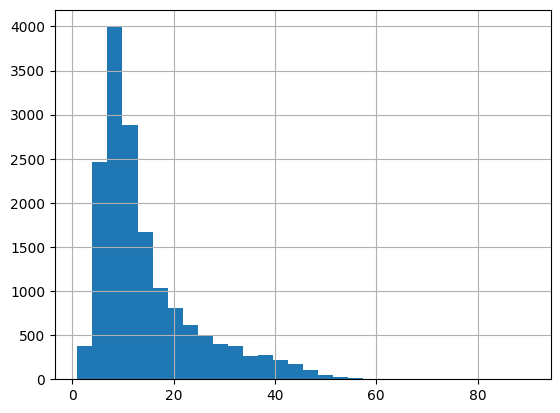

In [12]:
seq_length = [len(i.split()) for i in X_train]
pd.Series(seq_length).hist(bins=30)

In [13]:
def tokenize_sequences(texts, max_seq_len):
    return tokenizer.batch_encode_plus(
        texts.tolist(),
        max_length=max_seq_len,
        pad_to_max_length=True,
        truncation=True,
        return_token_type_ids=False
    )

# tokenize and encode sequences for train, validation, and test sets
max_seq_len=60
tokens_train = tokenize_sequences(X_train, max_seq_len)
tokens_val = tokenize_sequences(val_text, max_seq_len)
tokens_test = tokenize_sequences(test_text, max_seq_len)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [14]:
def create_tensor_dataset(tokens, labels):
    seq_tensor = torch.tensor(tokens['input_ids'])
    mask_tensor = torch.tensor(tokens['attention_mask'])
    y_tensor = torch.tensor(labels.tolist())
    return seq_tensor, mask_tensor, y_tensor

train_seq, train_mask, train_y = create_tensor_dataset(tokens_train, y_train)
val_seq, val_mask, val_y = create_tensor_dataset(tokens_val, val_labels)
test_seq, test_mask, test_y = create_tensor_dataset(tokens_test, test_labels)

In [15]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

def create_dataloader(inputs, masks, labels, sampler_type='random', batch_size=8):
    dataset = TensorDataset(inputs, masks, labels)
    if sampler_type == 'random':
        sampler = RandomSampler(dataset)
    elif sampler_type == 'sequential':
        sampler = SequentialSampler(dataset)
    else:
        raise ValueError("Invalid sampler type. Choose 'random' or 'sequential'.")
    dataloader = DataLoader(dataset, sampler=sampler, batch_size=batch_size)
    return dataloader

batch_size = 8

train_dataloader = create_dataloader(train_seq, train_mask, train_y, sampler_type='random', batch_size=batch_size)
val_dataloader = create_dataloader(val_seq, val_mask, val_y, sampler_type='sequential', batch_size=batch_size)

In [23]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

In [24]:
class BERT_arch(nn.Module):
    def __init__(self, bert):
        super(BERT_arch, self).__init__()
        self.bert = bert
        self.dropout = nn.Dropout(0.1)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(768, 512)
        self.fc2 = nn.Linear(512, 3)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, sent_id, mask):
        _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)
        x = self.dropout(cls_hs)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x


In [25]:
model = BERT_arch(bert)
model = model.to(device)

In [26]:
from transformers import AdamW
optimizer = AdamW(model.parameters(), lr=2e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [27]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_wts = compute_class_weight(class_weight = "balanced", classes = np.unique(y_train), y = y_train)
print(class_wts)

[1.43645529 8.08059701 0.45869694]


In [28]:
# convert class weights to tensor
weights= torch.tensor(class_wts,dtype=torch.float)
weights = weights.to(device)

# loss function
cross_entropy  = nn.NLLLoss(weight=weights)

In [29]:
from tqdm import tqdm

def train():
    model.train()
    total_loss = 0
    total_preds = []

    with tqdm(total=len(train_dataloader), desc="Training") as pbar:
        for step, batch in enumerate(train_dataloader):
            batch = [r.to(device) for r in batch]
            sent_id, mask, labels = batch
            model.zero_grad()
            preds = model(sent_id, mask)
            loss = cross_entropy(preds, labels)
            total_loss += loss.item()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            preds = preds.detach().cpu().numpy()
            total_preds.append(preds)

            pbar.update(1)

    avg_loss = total_loss / len(train_dataloader)
    total_preds = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds

In [30]:
def evaluate():
    model.eval()
    total_loss = 0
    total_preds = []

    with tqdm(total=len(val_dataloader), desc="Evaluating") as pbar:
        for step, batch in enumerate(val_dataloader):
            batch = [t.to(device) for t in batch]
            sent_id, mask, labels = batch

            with torch.no_grad():
                preds = model(sent_id, mask)
                loss = cross_entropy(preds, labels)
                total_loss += loss.item()
                preds = preds.detach().cpu().numpy()
                total_preds.append(preds)

            pbar.update(1)

    avg_loss = total_loss / len(val_dataloader)
    total_preds = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds


In [31]:
def train_and_evaluate(epochs,early_stopping_patience):
    best_valid_loss = float('inf')
    train_losses = []
    valid_losses = []

    for epoch in range(epochs):
        print('\nEpoch {:}/{:}'.format(epoch + 1, epochs))

        # training
        train_loss, _ = train()
        train_losses.append(train_loss)

        # validation
        valid_loss, _ = evaluate()
        valid_losses.append(valid_loss)

        # check if validation loss improved
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(model.state_dict(), '/content/drive/MyDrive/NEPAL/ML models/weights/nepnews_saved_weight.pt')
            patience_counter = 0  # reset patience counter
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print(f"Validation loss hasn't improved for {early_stopping_patience} epochs. Early stopping...")
                break

        print(f'\nTraining Loss: {train_loss:.3f}')
        print(f'Validation Loss: {valid_loss:.3f}')

    return train_losses, valid_losses

epochs = 20
patience=3
train_losses, valid_losses = train_and_evaluate(epochs,patience)


Epoch 1/20


Evaluating: 100%|██████████| 500/500 [00:16<00:00, 29.97it/s]



Training Loss: 1.014
Validation Loss: 0.982

Epoch 2/20


Evaluating: 100%|██████████| 500/500 [00:15<00:00, 32.02it/s]



Training Loss: 0.945
Validation Loss: 0.878

Epoch 3/20


Evaluating: 100%|██████████| 500/500 [00:15<00:00, 32.11it/s]



Training Loss: 0.915
Validation Loss: 0.868

Epoch 4/20


Evaluating: 100%|██████████| 500/500 [00:15<00:00, 31.80it/s]



Training Loss: 0.910
Validation Loss: 0.886

Epoch 5/20


Evaluating: 100%|██████████| 500/500 [00:15<00:00, 31.67it/s]



Training Loss: 0.895
Validation Loss: 0.813

Epoch 6/20


Evaluating: 100%|██████████| 500/500 [00:15<00:00, 31.70it/s]



Training Loss: 0.885
Validation Loss: 0.847

Epoch 7/20


Evaluating: 100%|██████████| 500/500 [00:15<00:00, 31.97it/s]



Training Loss: 0.874
Validation Loss: 0.881

Epoch 8/20


Evaluating: 100%|██████████| 500/500 [00:15<00:00, 31.81it/s]

Validation loss hasn't improved for 3 epochs. Early stopping...


In [32]:
# path = 'nepberta_saved_weights.pt'
path= '/content/drive/MyDrive/NEPAL/ML models/weights/nepnews_saved_weight.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [40]:
# get predictions for test data
with torch.no_grad():
  preds = model(test_seq.to(device), test_mask.to(device))
  preds = preds.detach().cpu().numpy()

In [41]:
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.47      0.82      0.60       929
           1       0.00      0.00      0.00       165
           2       0.91      0.74      0.82      2906

    accuracy                           0.73      4000
   macro avg       0.46      0.52      0.47      4000
weighted avg       0.77      0.73      0.73      4000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from imblearn.metrics import macro_averaged_mean_absolute_error

print("Accuracy -> ",accuracy_score(test_y, preds))
print("Recall -> ",recall_score(test_y, preds,average='macro'))
print("Precision -> ",precision_score(test_y, preds,average='macro'))
print("F1 score -> ",f1_score(test_y, preds,average='macro'))
# print("MAE -> ",mean_absolute_error(test_y, preds))
print("Macro MAE -> ",macro_averaged_mean_absolute_error(test_y, preds))
print(confusion_matrix(test_y, preds))

# NepaliBERT Sentiment

Accuracy ->  0.7325
Recall ->  0.5230695755610987
Precision ->  0.4609103317187581
F1 score ->  0.4730754222175186
Macro MAE ->  0.6205275155444694
[[ 766    0  163]
 [ 119    0   46]
 [ 742    0 2164]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, preds)

0.7325

In [37]:
from imblearn.metrics import macro_averaged_mean_absolute_error
macro_averaged_mean_absolute_error(test_y, preds)

0.6205275155444694

In [38]:
# confusion matrix
pd.crosstab(test_y, preds)

col_0,0,2
row_0,,
0,766,163
1,119,46
2,742,2164


In [43]:
test_y = test_y.tolist()
preds = preds.tolist()
new_df = pd.DataFrame(list(zip(test_y, preds)),
               columns =['Actual', 'NepaliBERT'])
new_df.to_csv('NepNewsbert_sentiment.csv')